# BP-ANN

## 1.Raw data

In [19]:
import time
import torch
import torch.nn as nn
import torch.optim as optim

class BPANNRegressor(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(BPANNRegressor, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  
        self.fc2 = nn.Linear(hidden_size, hidden_size)  
        self.fc3 = nn.Linear(hidden_size, output_size)  

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)  
        return x

input_size = 14  
hidden_size = 800  
output_size = 1   

model = BPANNRegressor(input_size, hidden_size, output_size)

criterion = nn.MSELoss()  
optimizer = optim.Adam(model.parameters(), lr=0.001)  

import numpy as np
import pandas as pd
data = pd.read_excel('data5.xlsx')
features = data.iloc[:,:14]
lables = data.iloc[:,14]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,lables,random_state=2024)

x_train = features
x_test = features

y_train = lables
y_test = lables

x_train = x_train.values.reshape(-1, 1, 14)

y_train = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)

history = []
start_time = time.time()  
num_epochs = 10000  
for epoch in range(num_epochs):
    
    model.train()  
    optimizer.zero_grad()  
    x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
    outputs = model(x_train_tensor)  
    loss = criterion(outputs, y_train.unsqueeze(1))  

    loss.backward()  
    optimizer.step()  
    
    # 记录损失值
    history.append(loss.item())
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')
end_time = time.time()  # 记录训练结束时间
total_training_time = end_time - start_time  # 计算训练所需时间
print(f'Total training time: {total_training_time:.2f} seconds')

Epoch 1/20000, Loss: 38977.1328125
Epoch 2/20000, Loss: 38770.7109375
Epoch 3/20000, Loss: 38589.8125
Epoch 4/20000, Loss: 38402.234375
Epoch 5/20000, Loss: 38196.015625
Epoch 6/20000, Loss: 37965.703125
Epoch 7/20000, Loss: 37709.8125
Epoch 8/20000, Loss: 37426.828125
Epoch 9/20000, Loss: 37115.19921875
Epoch 10/20000, Loss: 36773.30859375
Epoch 11/20000, Loss: 36399.52734375
Epoch 12/20000, Loss: 35992.19921875
Epoch 13/20000, Loss: 35549.6015625
Epoch 14/20000, Loss: 35070.09765625
Epoch 15/20000, Loss: 34552.12109375
Epoch 16/20000, Loss: 33994.31640625
Epoch 17/20000, Loss: 33395.41796875
Epoch 18/20000, Loss: 32754.283203125
Epoch 19/20000, Loss: 32069.81640625
Epoch 20/20000, Loss: 31341.53125
Epoch 21/20000, Loss: 30569.09765625
Epoch 22/20000, Loss: 29752.625
Epoch 23/20000, Loss: 28892.693359375
Epoch 24/20000, Loss: 27990.48046875
Epoch 25/20000, Loss: 27047.802734375
Epoch 26/20000, Loss: 26067.08203125
Epoch 27/20000, Loss: 25051.765625
Epoch 28/20000, Loss: 24006.31445312

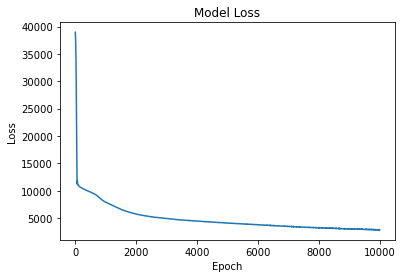

In [48]:
import matplotlib.pyplot as plt
plt.plot(history)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [49]:
x_test = x_test.values.reshape(-1, 1, 14)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)

y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)


model.eval()  
with torch.no_grad():
    predictions = model(x_test_tensor)  
    test_loss = criterion(predictions, y_test_tensor)  
    print(f'Test Loss: {test_loss.item()}')

Test Loss: 17630.09765625


In [42]:

x_test_tensor = torch.tensor(x_test, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

def evaluate_model(model, x_test, y_test):
    model.eval()  
    with torch.no_grad():  
        predictions = model(x_test)
        loss = criterion(predictions, y_test)  
    return loss.item()


test_loss = evaluate_model(model, x_test_tensor, y_test_tensor)
print(f'Test Loss: {test_loss}')

Test Loss: 16446.263671875


D:\Coding\anaconda\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([350, 1])) that is different to the input size (torch.Size([350, 1, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [10]:
model.load_state_dict(torch.load('bp_ann_regressor.pth'))

<All keys matched successfully>

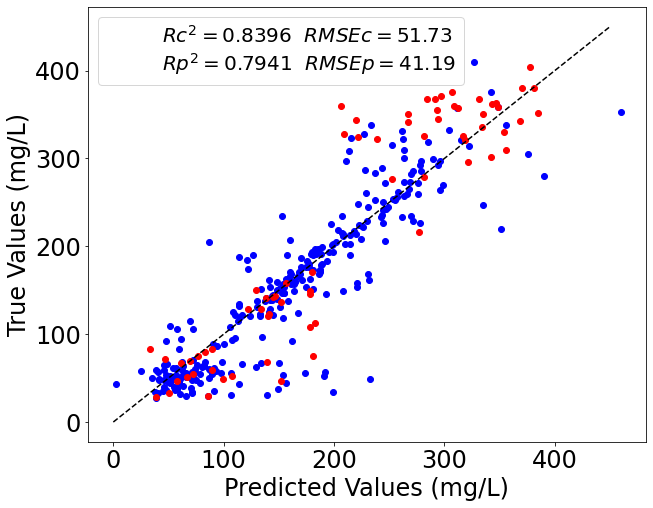

In [20]:

Cal_data = pd.read_excel('Cal-data.xlsx')
cal_features = Cal_data.iloc[:,:14]
cal_lables = Cal_data.iloc[:,14]

cal_features_tensor = torch.tensor(cal_features.values, dtype=torch.float32).unsqueeze(1)
cal_lables_tensor = torch.tensor(cal_lables.values, dtype=torch.float32).unsqueeze(1)


Test_data = pd.read_excel('Test-data.xlsx')
test_features = Test_data.iloc[:,:14]
test_lables = Test_data.iloc[:,14]

test_features_tensor = torch.tensor(test_features.values, dtype=torch.float32).unsqueeze(1)
test_lables_tensor = torch.tensor(test_lables.values, dtype=torch.float32).unsqueeze(1)

import matplotlib.pyplot as plt
import numpy as np

model.eval()  
with torch.no_grad():
    predictions_cal = model(cal_features_tensor)

with torch.no_grad():
    predictions_test = model(test_features_tensor)
    

predictions_np_cal = predictions_cal.detach().numpy().flatten()
true_values_np_cal = cal_lables_tensor.detach().numpy().flatten()

predictions_np_test = predictions_test.detach().numpy().flatten()
true_values_np_test = test_lables_tensor.detach().numpy().flatten()

y_true_mean_cal = np.mean(true_values_np_cal)
r2_cal = 1 - (np.sum((true_values_np_cal - predictions_np_cal) ** 2) / np.sum((true_values_np_cal - y_true_mean_cal) ** 2))

# RMSE
rmse_cal = np.sqrt(np.mean((true_values_np_cal - predictions_np_cal) ** 2))


y_true_mean_test = np.mean(true_values_np_test)
r2_test = 1 - (np.sum((true_values_np_test - predictions_np_test) ** 2) / np.sum((true_values_np_test - y_true_mean_test) ** 2))

# RMSE
rmse_test = np.sqrt(np.mean((true_values_np_test - predictions_np_test) ** 2))



plt.figure(figsize=(10, 8))
plt.scatter(predictions_np_cal, true_values_np_cal, color='blue')
plt.scatter(predictions_np_test, true_values_np_test, color='red')


plt.plot([0, 450], [0, 450], 'k--')

plt.xlabel('Predicted Values (mg/L)',fontsize=24)
plt.ylabel('True Values (mg/L)',fontsize=24)
plt.xticks(fontsize=24)  
plt.yticks(fontsize=24)
extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                              edgecolor='none', linewidth=0)
plt.legend([extra], [(r'$Rc^2={:.4f}$' + '  ' + r'$RMSEc={:.2f}$'+ '\n' + r'$Rp^2={:.4f}$'+ '  ' + r'$ RMSEp={:.2f}$').format(r2_test,rmse_test,r2_cal,rmse_cal)], 
           loc='upper left',fontsize=20)
plt.savefig('BP-ANN-raw.svg')

plt.show()

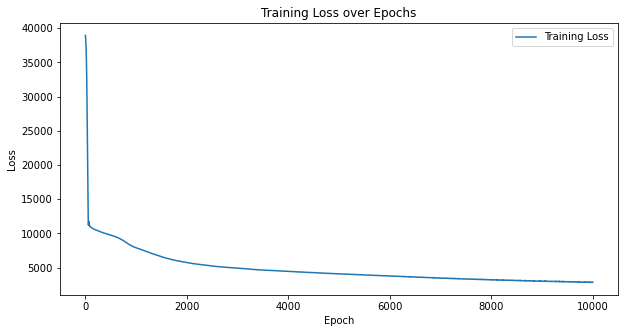

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history, label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [92]:
torch.save(model.state_dict(), 'bp_ann_regressor.pth')
#加载模型
#model.load_state_dict(torch.load('bp_ann_regressor.pth'))

## 2.z-score

In [116]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
class BPANNRegressor(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(BPANNRegressor, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size) 

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)  
        return x

input_size = 14  
hidden_size = 800  
output_size = 1   

model = BPANNRegressor(input_size, hidden_size, output_size)
criterion = nn.MSELoss()  
optimizer = optim.Adam(model.parameters(), lr=0.001)  

import numpy as np
import pandas as pd
data = pd.read_excel('data5.xlsx')
features = data.iloc[:,:14]
lables = data.iloc[:,14]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,lables,random_state=2024)

x_train = features
x_test = features

y_train = lables
y_test = lables

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

x_train = x_train.reshape(-1, 1, 14)

y_train = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)

history = []
start_time = time.time()  
num_epochs = 10000  
for epoch in range(num_epochs):
    model.train()  
    optimizer.zero_grad()  
    x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
    outputs = model(x_train_tensor)  
    loss = criterion(outputs, y_train.unsqueeze(1))  

    loss.backward()  
    optimizer.step() 
    
    history.append(loss.item())
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

end_time = time.time()  
total_training_time = end_time - start_time  
print(f'Total training time: {total_training_time:.2f} seconds')

Epoch 1/5000, Loss: 38998.56640625
Epoch 2/5000, Loss: 38585.60546875
Epoch 3/5000, Loss: 38172.671875
Epoch 4/5000, Loss: 37722.95703125
Epoch 5/5000, Loss: 37222.4609375
Epoch 6/5000, Loss: 36669.11328125
Epoch 7/5000, Loss: 36063.14453125
Epoch 8/5000, Loss: 35404.71875
Epoch 9/5000, Loss: 34693.78125
Epoch 10/5000, Loss: 33930.5703125
Epoch 11/5000, Loss: 33115.8046875
Epoch 12/5000, Loss: 32250.853515625
Epoch 13/5000, Loss: 31337.77734375
Epoch 14/5000, Loss: 30379.625
Epoch 15/5000, Loss: 29380.591796875
Epoch 16/5000, Loss: 28346.0
Epoch 17/5000, Loss: 27282.609375
Epoch 18/5000, Loss: 26198.66015625
Epoch 19/5000, Loss: 25103.9375
Epoch 20/5000, Loss: 24009.826171875
Epoch 21/5000, Loss: 22929.298828125
Epoch 22/5000, Loss: 21876.76953125
Epoch 23/5000, Loss: 20867.783203125
Epoch 24/5000, Loss: 19918.439453125
Epoch 25/5000, Loss: 19044.83203125
Epoch 26/5000, Loss: 18261.939453125
Epoch 27/5000, Loss: 17582.224609375
Epoch 28/5000, Loss: 17013.9921875
Epoch 29/5000, Loss: 16

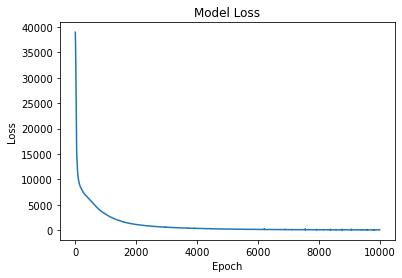

In [54]:
import matplotlib.pyplot as plt

plt.plot(history)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [55]:
x_test = x_test.reshape(-1, 1, 14)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)

y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

model.eval()  
with torch.no_grad():
    predictions = model(x_test_tensor)  
    test_loss = criterion(predictions, y_test_tensor)  
    print(f'Test Loss: {test_loss.item()}')

Test Loss: 21285.59765625


D:\Coding\anaconda\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([350, 1])) that is different to the input size (torch.Size([350, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [12]:
model.load_state_dict(torch.load('bp_ann_regressor-zscore.pth'))

<All keys matched successfully>

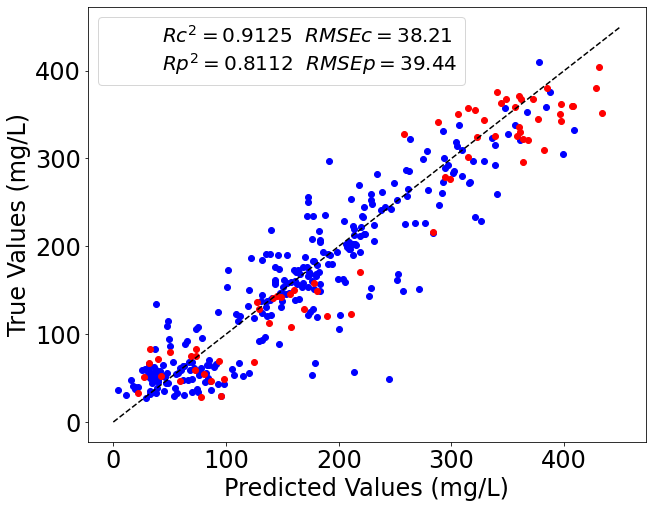

In [13]:
Cal_data = pd.read_excel('Cal-data.xlsx')
cal_features = Cal_data.iloc[:,:14]
cal_lables = Cal_data.iloc[:,14]

Test_data = pd.read_excel('Test-data.xlsx')
test_features = Test_data.iloc[:,:14]
test_lables = Test_data.iloc[:,14]

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(cal_features)
cal_features=scaler.transform(cal_features)
test_features=scaler.transform(test_features)

cal_features_tensor = torch.tensor(cal_features, dtype=torch.float32).unsqueeze(1)
cal_lables_tensor = torch.tensor(cal_lables.values, dtype=torch.float32).unsqueeze(1)

test_features_tensor = torch.tensor(test_features, dtype=torch.float32).unsqueeze(1)
test_lables_tensor = torch.tensor(test_lables.values, dtype=torch.float32).unsqueeze(1)


import matplotlib.pyplot as plt
import numpy as np

model.eval()  
with torch.no_grad():
    predictions_cal = model(cal_features_tensor)

with torch.no_grad():
    predictions_test = model(test_features_tensor)
    

predictions_np_cal = predictions_cal.detach().numpy().flatten()
true_values_np_cal = cal_lables_tensor.detach().numpy().flatten()

predictions_np_test = predictions_test.detach().numpy().flatten()
true_values_np_test = test_lables_tensor.detach().numpy().flatten()

y_true_mean_cal = np.mean(true_values_np_cal)
r2_cal = 1 - (np.sum((true_values_np_cal - predictions_np_cal) ** 2) / np.sum((true_values_np_cal - y_true_mean_cal) ** 2))

# RMSE
rmse_cal = np.sqrt(np.mean((true_values_np_cal - predictions_np_cal) ** 2))


y_true_mean_test = np.mean(true_values_np_test)
r2_test = 1 - (np.sum((true_values_np_test - predictions_np_test) ** 2) / np.sum((true_values_np_test - y_true_mean_test) ** 2))

# RMSE
rmse_test = np.sqrt(np.mean((true_values_np_test - predictions_np_test) ** 2))


plt.figure(figsize=(10, 8))
plt.scatter(predictions_np_cal, true_values_np_cal, color='blue')
plt.scatter(predictions_np_test, true_values_np_test, color='red')


plt.plot([0, 450], [0, 450], 'k--')

plt.xlabel('Predicted Values (mg/L)',fontsize=24)
plt.ylabel('True Values (mg/L)',fontsize=24)
plt.xticks(fontsize=24)  
plt.yticks(fontsize=24)
extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                              edgecolor='none', linewidth=0)
plt.legend([extra], [(r'$Rc^2={:.4f}$' + '  ' + r'$RMSEc={:.2f}$'+ '\n' + r'$Rp^2={:.4f}$'+ '  ' + r'$ RMSEp={:.2f}$').format(r2_test,rmse_test,r2_cal,rmse_cal)], 
           loc='upper left',fontsize=20)
plt.savefig('BP-ANN-zscore.svg')

plt.show()

In [95]:
torch.save(model.state_dict(), 'bp_ann_regressor-zscore.pth')
#加载模型
#model.load_state_dict(torch.load('bp_ann_regressor-zscore.pth'))

## 3.Minmax

In [21]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
class BPANNRegressor(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(BPANNRegressor, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)  

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)  
        return x

input_size = 14  
hidden_size = 800  
output_size = 1   

model = BPANNRegressor(input_size, hidden_size, output_size)
criterion = nn.MSELoss()  
optimizer = optim.Adam(model.parameters(), lr=0.001)  

import numpy as np
import pandas as pd
data = pd.read_excel('data5.xlsx')
features = data.iloc[:,:14]
lables = data.iloc[:,14]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,lables,random_state=2024)

x_train = features
x_test = features

y_train = lables
y_test = lables

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

x_train = x_train.reshape(-1, 1, 14)

y_train = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)

history = []
start_time = time.time()  
num_epochs = 20000  
for epoch in range(num_epochs):
    model.train()  
    optimizer.zero_grad()  
    x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
    outputs = model(x_train_tensor)  
    loss = criterion(outputs, y_train.unsqueeze(1))  

    loss.backward()  
    optimizer.step()  
    
    history.append(loss.item())
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')
    

end_time = time.time()  
total_training_time = end_time - start_time  
print(f'Total training time: {total_training_time:.2f} seconds')

Epoch 1/20000, Loss: 38980.1171875
Epoch 2/20000, Loss: 38698.22265625
Epoch 3/20000, Loss: 38431.51953125
Epoch 4/20000, Loss: 38149.28515625
Epoch 5/20000, Loss: 37837.43359375
Epoch 6/20000, Loss: 37489.203125
Epoch 7/20000, Loss: 37102.23828125
Epoch 8/20000, Loss: 36674.5078125
Epoch 9/20000, Loss: 36203.93359375
Epoch 10/20000, Loss: 35688.19921875
Epoch 11/20000, Loss: 35125.21875
Epoch 12/20000, Loss: 34513.12109375
Epoch 13/20000, Loss: 33850.109375
Epoch 14/20000, Loss: 33134.61328125
Epoch 15/20000, Loss: 32365.375
Epoch 16/20000, Loss: 31541.44921875
Epoch 17/20000, Loss: 30662.396484375
Epoch 18/20000, Loss: 29728.39453125
Epoch 19/20000, Loss: 28740.15234375
Epoch 20/20000, Loss: 27699.34765625
Epoch 21/20000, Loss: 26608.95703125
Epoch 22/20000, Loss: 25473.005859375
Epoch 23/20000, Loss: 24297.01171875
Epoch 24/20000, Loss: 23088.18359375
Epoch 25/20000, Loss: 21855.5234375
Epoch 26/20000, Loss: 20609.931640625
Epoch 27/20000, Loss: 19364.46484375
Epoch 28/20000, Loss: 

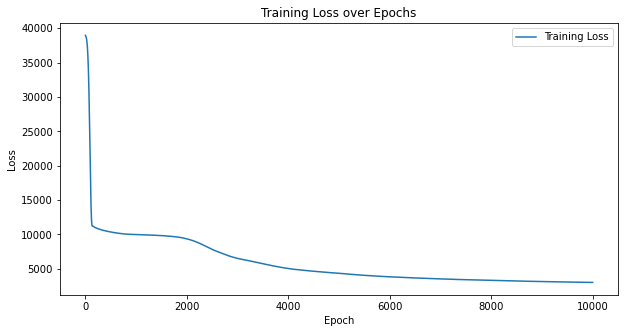

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history, label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
x_test = x_test.reshape(-1, 1, 14)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)

y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)


model.eval()  
with torch.no_grad():
    predictions = model(x_test_tensor)  
    test_loss = criterion(predictions, y_test_tensor)  
    print(f'Test Loss: {test_loss.item()}')

Test Loss: 17830.904296875


D:\Coding\anaconda\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([350, 1])) that is different to the input size (torch.Size([350, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [17]:
model.load_state_dict(torch.load('bp_ann_regressor-zscore.pth'))

<All keys matched successfully>

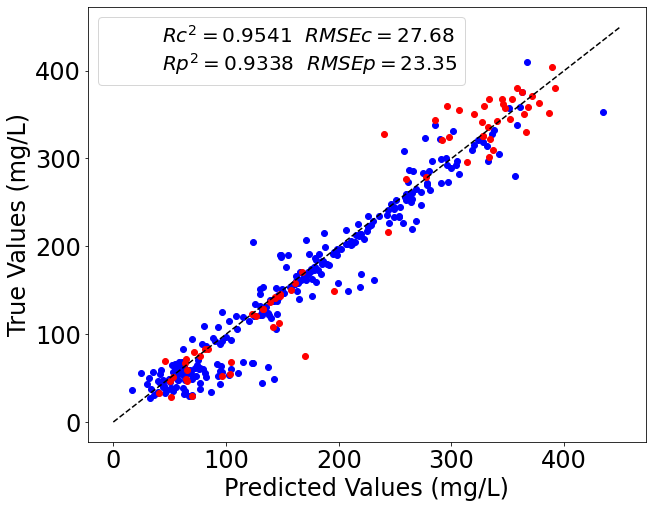

In [22]:

Cal_data = pd.read_excel('Cal-data.xlsx')
cal_features = Cal_data.iloc[:,:14]
cal_lables = Cal_data.iloc[:,14]


Test_data = pd.read_excel('Test-data.xlsx')
test_features = Test_data.iloc[:,:14]
test_lables = Test_data.iloc[:,14]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(cal_features)
cal_features=scaler.transform(cal_features)
test_features=scaler.transform(test_features)

cal_features_tensor = torch.tensor(cal_features, dtype=torch.float32).unsqueeze(1)
cal_lables_tensor = torch.tensor(cal_lables.values, dtype=torch.float32).unsqueeze(1)

test_features_tensor = torch.tensor(test_features, dtype=torch.float32).unsqueeze(1)
test_lables_tensor = torch.tensor(test_lables.values, dtype=torch.float32).unsqueeze(1)


import matplotlib.pyplot as plt
import numpy as np

model.eval()  
with torch.no_grad():
    predictions_cal = model(cal_features_tensor)

with torch.no_grad():
    predictions_test = model(test_features_tensor)
    

predictions_np_cal = predictions_cal.detach().numpy().flatten()
true_values_np_cal = cal_lables_tensor.detach().numpy().flatten()

predictions_np_test = predictions_test.detach().numpy().flatten()
true_values_np_test = test_lables_tensor.detach().numpy().flatten()

y_true_mean_cal = np.mean(true_values_np_cal)
r2_cal = 1 - (np.sum((true_values_np_cal - predictions_np_cal) ** 2) / np.sum((true_values_np_cal - y_true_mean_cal) ** 2))


rmse_cal = np.sqrt(np.mean((true_values_np_cal - predictions_np_cal) ** 2))


y_true_mean_test = np.mean(true_values_np_test)
r2_test = 1 - (np.sum((true_values_np_test - predictions_np_test) ** 2) / np.sum((true_values_np_test - y_true_mean_test) ** 2))


rmse_test = np.sqrt(np.mean((true_values_np_test - predictions_np_test) ** 2))



plt.figure(figsize=(10, 8))
plt.scatter(predictions_np_cal, true_values_np_cal, color='blue')
plt.scatter(predictions_np_test, true_values_np_test, color='red')


plt.plot([0, 450], [0, 450], 'k--')


plt.xlabel('Predicted Values (mg/L)',fontsize=24)
plt.ylabel('True Values (mg/L)',fontsize=24)
plt.xticks(fontsize=24)  
plt.yticks(fontsize=24)
extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                              edgecolor='none', linewidth=0)
plt.legend([extra], [(r'$Rc^2={:.4f}$' + '  ' + r'$RMSEc={:.2f}$'+ '\n' + r'$Rp^2={:.4f}$'+ '  ' + r'$ RMSEp={:.2f}$').format(r2_test,rmse_test,r2_cal,rmse_cal)], 
           loc='upper left',fontsize=20)
plt.savefig('BP-ANN-minmax.svg')

plt.show()

In [98]:
torch.save(model.state_dict(), 'bp_ann_regressor-minmax.pth')

#model.load_state_dict(torch.load('bp_ann_regressor-zscore.pth'))

## heatmap

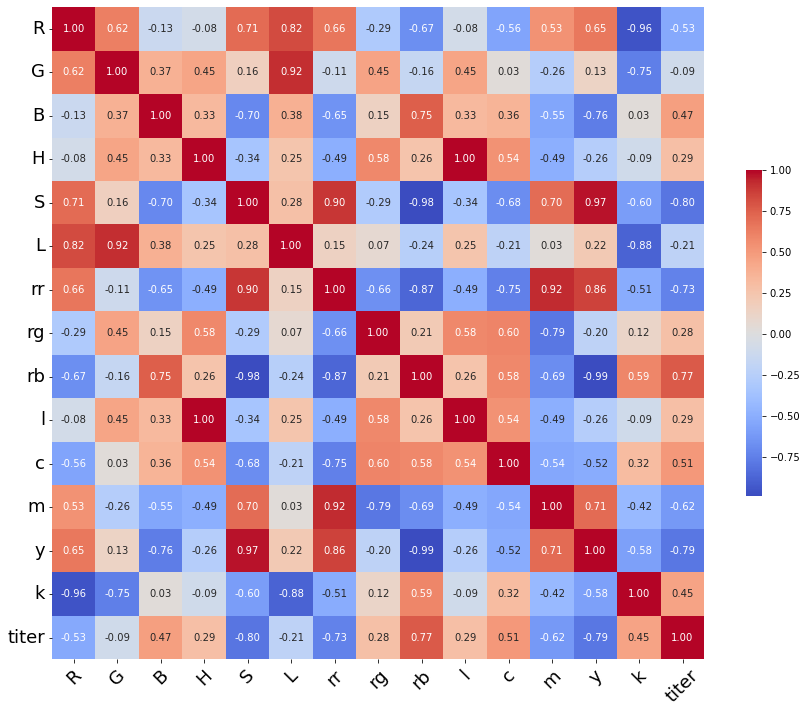

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_excel('data5.xlsx')

corr_matrix = df.corr()


plt.figure(figsize=(15, 12))  
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .5})



plt.xticks(rotation=45, fontsize=18)  
plt.yticks(rotation=0, fontsize=18)

plt.savefig('heatmap.svg')

plt.show()